In [71]:
# import pandas as pd

# data1 = pd.read_csv('../data/data.csv')
# data1.head(10)

,磁芯材料,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,材料1,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,材料1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,材料1,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,材料1,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,材料1,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183
5,材料1,25,50020,14273.854210,正弦波,0.005075,0.005463,0.005851,0.006238,0.006625,...,0.001190,0.001579,0.001968,0.002357,0.002745,0.003132,0.003521,0.003909,0.004297,0.004686
6,材料1,25,50020,56401.529520,正弦波,-0.002206,-0.001514,-0.000824,-0.000135,0.000555,...,-0.009091,-0.008405,-0.007720,-0.007034,-0.006346,-0.005656,-0.004967,-0.004277,-0.003587,-0.002898
7,材料1,25,50020,73651.317280,正弦波,-0.000275,0.000504,0.001280,0.002057,0.002834,...,-0.008041,-0.007264,-0.006488,-0.005713,-0.004938,-0.004163,-0.003387,-0.002609,-0.001830,-0.001053
8,材料1,25,50020,125047.812200,正弦波,-0.002681,-0.001699,-0.000719,0.000261,0.001242,...,-0.012464,-0.011488,-0.010510,-0.009534,-0.008556,-0.007576,-0.006599,-0.005621,-0.004643,-0.003663
9,材料1,25,50020,161776.605900,正弦波,0.006598,0.007689,0.008779,0.009867,0.010954,...,-0.004305,-0.003215,-0.002124,-0.001033,0.000058,0.001148,0.002238,0.003328,0.004417,0.005507


In [72]:
# subset = data1.iloc[:, 5:]

# # 计算每行的最大值并形成新的一列
# data1['max_value'] = subset.max(axis=1)
# # 输出结果
# data1['max_value']


0        0.028849
1        0.031419
2        0.035535
3        0.040015
4        0.045028
           ...   
12395    0.034867
12396    0.038341
12397    0.048877
12398    0.054889
12399    0.069135
Name: max_value, Length: 12400, dtype: float64

In [73]:
# data1 = data1[["温度，oC", "频率，Hz", "磁芯损耗，w/m3", "max_value", "励磁波形"]]

In [74]:
# data1.columns

Index(['温度，oC', '频率，Hz', '磁芯损耗，w/m3', 'max_value', '励磁波形'], dtype='object')

In [75]:
# data1[data1['励磁波形']=='正弦波'].describe()

,温度，oC,频率，Hz,磁芯损耗，w/m3,max_value
count,4054.000000,4054.000000,4.054000e+03,4054.000000
mean,57.269364,168939.802664,8.759442e+04,0.064542
std,24.411261,113176.954151,1.492972e+05,0.055597
min,25.000000,50010.000000,4.156131e+02,0.010998
25%,25.000000,79460.000000,4.642594e+03,0.024663
50%,50.000000,125860.000000,2.098723e+04,0.043947
75%,70.000000,223850.000000,9.941901e+04,0.087094
max,90.000000,501180.000000,1.223675e+06,0.291540


In [76]:
# data1[data1['励磁波形']=='正弦波'].to_csv('Q2_data.csv',index=None)

In [79]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

data1 = pd.read_csv('Q2_data.csv')

data1=data1[data1['励磁波形']=='正弦波']

In [81]:
data1.columns=['温度', '频率', '磁芯损耗', '峰值磁通密度', '励磁波形']
data1

,温度,频率,磁芯损耗,峰值磁通密度,励磁波形
0,25,50030,1997.955250,0.028849,正弦波
1,25,50020,2427.749830,0.031419,正弦波
2,25,50020,3332.725760,0.035535,正弦波
3,25,50020,4502.908007,0.040015,正弦波
4,25,50030,6063.023248,0.045028,正弦波
...,...,...,...,...,...
4049,25,354830,29366.240000,0.024510,正弦波
4050,25,99960,6774.100000,0.027590,正弦波
4051,25,158510,1731.490000,0.013940,正弦波
4052,25,316240,44961.690000,0.031130,正弦波


In [82]:
data1=data1[['温度', '频率', '磁芯损耗', '峰值磁通密度']]

In [83]:
data1

,温度,频率,磁芯损耗,峰值磁通密度
0,25,50030,1997.955250,0.028849
1,25,50020,2427.749830,0.031419
2,25,50020,3332.725760,0.035535
3,25,50020,4502.908007,0.040015
4,25,50030,6063.023248,0.045028
...,...,...,...,...
4049,25,354830,29366.240000,0.024510
4050,25,99960,6774.100000,0.027590
4051,25,158510,1731.490000,0.013940
4052,25,316240,44961.690000,0.031130


In [26]:
# data1.to_csv('Q2_data.csv',index=None)

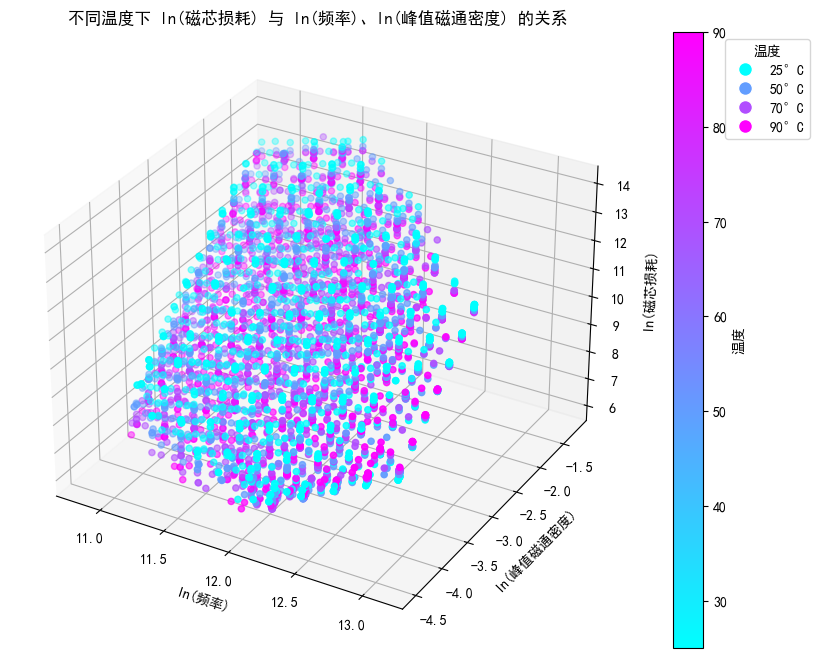

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
plt.rcParams['axes.unicode_minus'] = False

# 创建颜色映射
norm = Normalize(vmin=data1['温度'].min(), vmax=data1['温度'].max())
cmap = plt.get_cmap('cool')

# 绘制磁芯损耗与频率、峰值磁通密度的关系
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(np.log(data1['频率']), np.log(data1['峰值磁通密度']), np.log(data1['磁芯损耗']),
                     c=data1['温度'], cmap='cool')

ax.set_xlabel('ln(频率)')
ax.set_ylabel('ln(峰值磁通密度)')
ax.set_zlabel('ln(磁芯损耗)')
ax.set_title('不同温度下 ln(磁芯损耗) 与 ln(频率)、ln(峰值磁通密度) 的关系')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('温度')
# 创建自定义图例
unique_temps = sorted(data1['温度'].unique())
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              label=f'{temp}°C',
                              markerfacecolor=cmap(norm(temp)), markersize=10)
                   for temp in unique_temps]

# 添加图例
ax.legend(handles=legend_elements, title='温度', loc='upper left', bbox_to_anchor=(1.15, 1))

plt.show()

In [86]:
# 第一步：拟合所有数据，求解 alpha 和 beta
# 定义线性回归模型：ln(P) = ln(k) + alpha * ln(f) + beta * ln(Bm)
def linear_model(X, ln_k, alpha, beta):
    ln_f, ln_Bm = X
    return ln_k + alpha * ln_f + beta * ln_Bm

print(data1.shape)

# 准备数据
ln_P = np.log(data1["磁芯损耗"])
ln_f = np.log(data1["频率"])
ln_Bm = np.log(data1["峰值磁通密度"])
print(ln_P.shape, ln_f.shape, ln_Bm.shape)
X = np.vstack((ln_f, ln_Bm))
print(X.shape)
# 全局拟合，初始猜测值 [ln(k), alpha, beta]
# X是输入，ln_P是输出，p0是初始猜测值
popt, pcov = curve_fit(linear_model, X, ln_P, p0=[-10, 1.5, 2.5])

ln_k_global, alpha, beta = popt
k_global = np.exp(ln_k_global)

print("\n拟合得到的全局参数：")
print(f"ln(k_global) = {ln_k_global:.4f}")
print(f"k_global = {k_global:.4e}")
print(f"alpha = {alpha:.4f}")
print(f"beta = {beta:.4f}")

(4054, 4)
(4054,) (4054,) (4054,)
(2, 4054)

拟合得到的全局参数：
ln(k_global) = -1.9271
k_global = 1.4557e-01
alpha = 1.6500
beta = 2.4826


In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # 假设 data1, ln_P, ln_f, ln_Bm, popt 已经定义好了

# def plot_3d_scatter_and_surface():
#     fig = plt.figure(figsize=(12, 8))
#     ax = fig.add_subplot(111, projection='3d')
    
#     # 散点图
#     scatter = ax.scatter(data1['频率'], data1['峰值磁通密度'], data1['磁芯损耗'],
#                          c=np.log(data1['磁芯损耗']), cmap='viridis')
    
#     # 拟合曲面
#     f_range = np.logspace(np.log10(data1['频率'].min()), np.log10(data1['频率'].max()), 50)
#     Bm_range = np.logspace(np.log10(data1['峰值磁通密度'].min()), np.log10(data1['峰值磁通密度'].max()), 50)
#     F, BM = np.meshgrid(f_range, Bm_range)
#     P_fit = np.exp(linear_model(np.vstack((np.log(F.ravel()), np.log(BM.ravel()))), *popt)).reshape(F.shape)
    
#     surface = ax.plot_surface(F, BM, P_fit, cmap='viridis', alpha=0.5)
    
#     ax.set_xlabel('频率 (Hz)')
#     ax.set_ylabel('峰值磁通密度 (T)')
#     ax.set_zlabel('磁芯损耗 (W/kg)')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.set_zscale('log')
#     ax.set_title('磁芯损耗：实际数据 vs 拟合模型')
    
#     plt.colorbar(scatter, label='ln(磁芯损耗)')
#     plt.tight_layout()
#     plt.show()

# def plot_2d_comparisons():
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
#     # 频率 vs 磁芯损耗
#     ax1.scatter(data1['频率'], data1['磁芯损耗'], alpha=0.5, label='实际数据')
#     f_range = np.logspace(np.log10(data1['频率'].min()), np.log10(data1['频率'].max()), 100)
#     Bm_mean = data1['峰值磁通密度'].mean()
#     P_fit = np.exp(linear_model(np.vstack((np.log(f_range), np.log(np.full_like(f_range, Bm_mean)))), *popt))
#     ax1.plot(f_range, P_fit, 'r-', label='拟合曲线')
#     ax1.set_xscale('log')
#     ax1.set_yscale('log')
#     ax1.set_xlabel('频率 (Hz)')
#     ax1.set_ylabel('磁芯损耗 (W/kg)')
#     ax1.set_title('频率 vs 磁芯损耗 (平均峰值磁通密度)')
#     ax1.legend()
    
#     # 峰值磁通密度 vs 磁芯损耗
#     ax2.scatter(data1['峰值磁通密度'], data1['磁芯损耗'], alpha=0.5, label='实际数据')
#     Bm_range = np.logspace(np.log10(data1['峰值磁通密度'].min()), np.log10(data1['峰值磁通密度'].max()), 100)
#     f_mean = data1['频率'].mean()
#     P_fit = np.exp(linear_model(np.vstack((np.log(np.full_like(Bm_range, f_mean)), np.log(Bm_range))), *popt))
#     ax2.plot(Bm_range, P_fit, 'r-', label='拟合曲线')
#     ax2.set_xscale('log')
#     ax2.set_yscale('log')
#     ax2.set_xlabel('峰值磁通密度 (T)')
#     ax2.set_ylabel('磁芯损耗 (W/kg)')
#     ax2.set_title('峰值磁通密度 vs 磁芯损耗 (平均频率)')
#     ax2.legend()
    
#     plt.tight_layout()
#     plt.show()

# def plot_residuals():
#     P_predicted = np.exp(linear_model(np.vstack((ln_f, ln_Bm)), *popt))
#     residuals = data1['磁芯损耗'] - P_predicted
    
#     plt.figure(figsize=(10, 6))
#     plt.scatter(P_predicted, residuals)
#     plt.axhline(y=0, color='r', linestyle='--')
#     plt.xlabel('预测的磁芯损耗 (W/kg)')
#     plt.ylabel('残差 (实际值 - 预测值)')
#     plt.title('残差图')
#     plt.tight_layout()
#     plt.show()

# # 调用函数来生成图表
# # plot_3d_scatter_and_surface()
# plot_2d_comparisons()
# plot_residuals()

In [87]:
# 第二步：在每个温度下，计算 ln(k_i)
temperatures_unique = data1['温度'].unique()
ln_k_list = []

for T in temperatures_unique:
    data_T = data1[data1['温度'] == T]
    ln_P_T = np.log(data_T['磁芯损耗'])
    ln_f_T = np.log(data_T['频率'])
    ln_Bm_T = np.log(data_T['峰值磁通密度'])
    X_T = np.vstack((ln_f_T, ln_Bm_T))

    # 固定 alpha 和 beta，只拟合 ln(k_i)
    def linear_model_k(X, ln_k):
        ln_f, ln_Bm = X
        return ln_k + alpha * ln_f + beta * ln_Bm

    popt_T, _ = curve_fit(linear_model_k, X_T, ln_P_T, p0=[ln_k_global])
    ln_k_T = popt_T[0]
    ln_k_list.append({'温度': T, 'ln_k': ln_k_T})

    print(f"\n温度 {T}℃ 下的 ln(k_i)：{ln_k_T:.4f}")


温度 25℃ 下的 ln(k_i)：-1.5138

温度 50℃ 下的 ln(k_i)：-1.8892

温度 70℃ 下的 ln(k_i)：-2.1447

温度 90℃ 下的 ln(k_i)：-2.2342



拟合得到的温度修正参数：
ln(k0) = -1.2785
k0 = 2.7845e-01
gamma = -0.0114


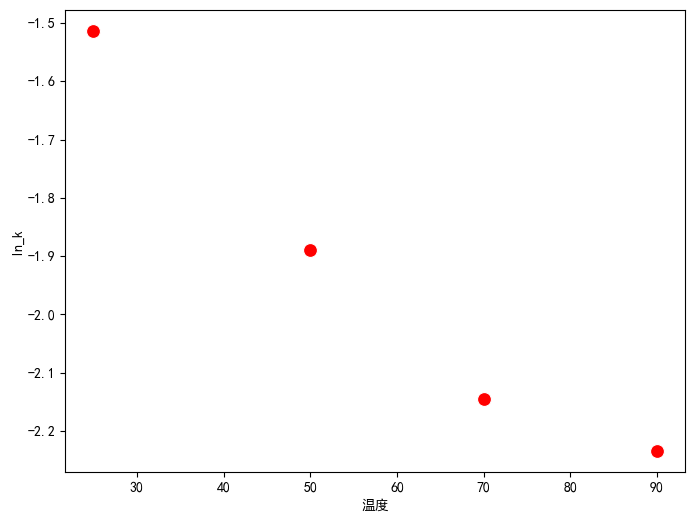

In [88]:
# 将 ln(k_i) 与温度整理为 DataFrame
ln_k_df = pd.DataFrame(ln_k_list)

# 绘制 ln(k_i) 与温度的关系图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='温度', y='ln_k', data=ln_k_df, s=100, color='red')
# 拟合 ln(k_i) 与温度的关系，假设 ln(k) = ln(k0) + gamma * T
def ln_k_func(T, ln_k0, gamma):
    return ln_k0 + gamma * T

popt_k, _ = curve_fit(ln_k_func, ln_k_df['温度'], ln_k_df['ln_k'])
ln_k0, gamma = popt_k
k0 = np.exp(ln_k0)

print(f"\n拟合得到的温度修正参数：")
print(f"ln(k0) = {ln_k0:.4f}")
print(f"k0 = {k0:.4e}")
print(f"gamma = {gamma:.4f}")


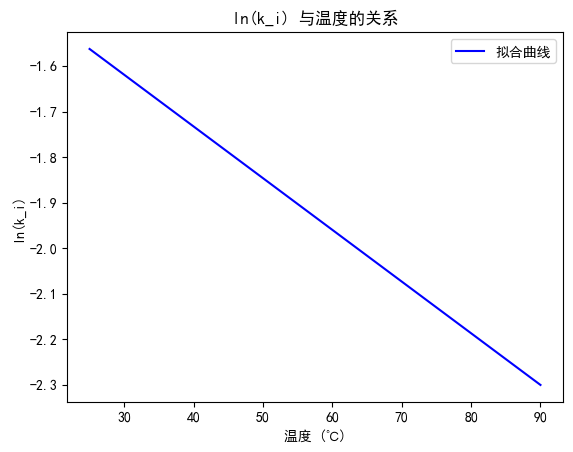

In [89]:
# 绘制拟合曲线
T_fit = np.linspace(temperatures_unique.min(), temperatures_unique.max(), 100)
ln_k_fit = ln_k_func(T_fit, ln_k0, gamma)
plt.plot(T_fit, ln_k_fit, label='拟合曲线', color='blue')
plt.xlabel('温度 (℃)')
plt.ylabel('ln(k_i)')
plt.title('ln(k_i) 与温度的关系')
plt.legend()
plt.show()

## 构建一个更复杂的MSE

In [85]:
# 拟合一个更为复杂的MSE
# 定义线性回归模型：ln(P) = ln(k) + alpha * ln(f) + beta * ln(Bm)
def linear_model(X, ln_k, a, a_0, b, b_0, c):
    ln_f, ln_Bm, T = X
    return a * T + ln_k + (a_0 + b * T) * ln_f + (b_0 + c * T) * ln_Bm

print(data1.shape)
# 准备数据
ln_P = np.log(data1["磁芯损耗"])
ln_f = np.log(data1["频率"])
ln_Bm = np.log(data1["峰值磁通密度"])
T = data1["温度"]
print(ln_P.shape, ln_f.shape, ln_Bm.shape)
X = np.vstack((ln_f, ln_Bm, T))
print(X.shape)
# 全局拟合，初始猜测值 [ln(k), alpha, beta]
# X是输入，ln_P是输出，p0是初始猜测值
popt, pcov = curve_fit(linear_model, X, ln_P)

ln_k, a, a_0, b, b_0, c = popt
k_global_mse = np.exp(ln_k)

print("\n拟合得到的全局参数：")
print(f"ln(k_global_mse) = {ln_k:.4f}")
print(f"k_global_mse = {k_global_mse:.4e}")
print(f"a = {a:.4f}")
print(f"a_0 = {a_0:.4f}")
print(f"b = {b:.4f}")
print(f"b_0 = {b_0:.4f}")
print(f"c = {c:.4f}")

(4054, 4)
(4054,) (4054,) (4054,)
(3, 4054)

拟合得到的全局参数：
ln(k_global_mse) = 4.5952
k_global_mse = 9.9007e+01
a = -0.1163
a_0 = 1.1309
b = 0.0094
b_0 = 2.3931
c = 0.0020


In [91]:
# 第三步：建立修正后的斯坦麦茨方程，并进行预测
# 原始斯坦麦茨方程的预测（不考虑温度修正）
data1['P_pred_SE'] = k_global * data1['频率']**alpha * data1['峰值磁通密度']**beta

# 修正后的斯坦麦茨方程的预测（考虑温度修正）
# 计算 k(T) = k0 * exp(gamma * T)
data1['k_T'] = k_global_mse * np.exp(a * data1['温度'])
data1['P_pred_Mod'] = data1['k_T'] * data1['频率']**(a_0 + b * data1['温度']) * data1['峰值磁通密度']**(b_0 + c * data1['温度'])
# data1['k_T'] = k0 * np.exp(gamma * data1['温度'])
# data1['P_pred_Mod'] = data1['k_T'] * data1['频率']**alpha * data1['峰值磁通密度']**beta


# 计算误差
data1['误差_SE'] = np.abs(data1['磁芯损耗'] - data1['P_pred_SE']) / data1['磁芯损耗'] * 100
data1['误差_Mod'] = np.abs(data1['磁芯损耗'] - data1['P_pred_Mod']) / data1['磁芯损耗'] * 100

print("\n预测结果样本：")
data1[['温度', '频率', '峰值磁通密度', '磁芯损耗', 'P_pred_SE', 'P_pred_Mod', '误差_SE', '误差_Mod']].head()



预测结果样本：


,温度,频率,峰值磁通密度,磁芯损耗,P_pred_SE,P_pred_Mod,误差_SE,误差_Mod
0,25,50030,0.028849,1997.955250,1241.814410,2438.400589,37.845735,22.044805
1,25,50020,0.031419,2427.749830,1534.409496,3002.839886,36.797051,23.688193
2,25,50020,0.035535,3332.725760,2082.834123,4056.094910,37.503585,21.705031
3,25,50020,0.040015,4502.908007,2796.993566,5421.041590,37.884728,20.389792
4,25,50030,0.045028,6063.023248,3750.336832,7234.150927,38.144113,19.315903


TypeError: _scatter_legend_artist() got multiple values for keyword argument 'label'

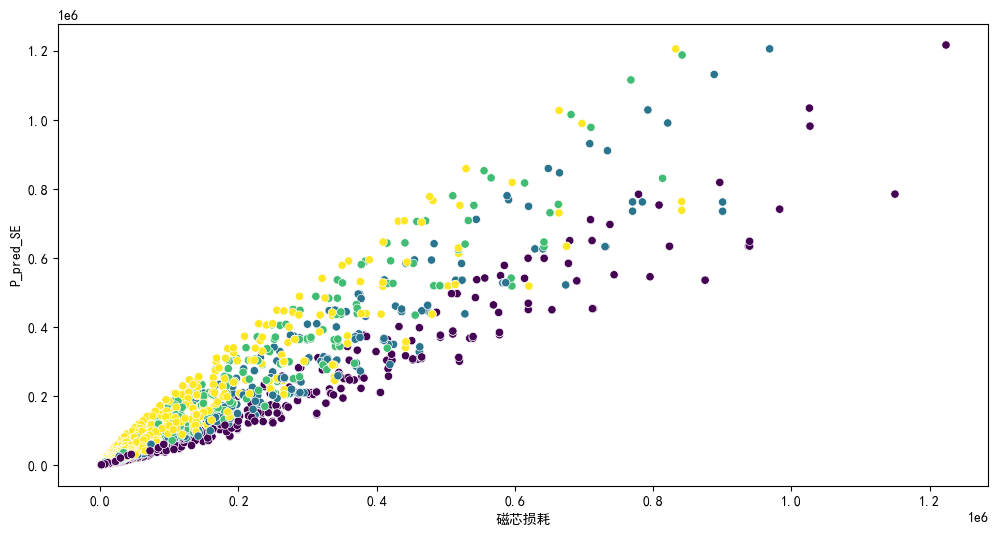

In [92]:
# 绘制预测值与实际值的对比图
plt.figure(figsize=(12, 6))
sns.scatterplot(x='磁芯损耗', y='P_pred_SE', hue='温度', data=data1, palette='viridis', label='原始SE预测')
sns.lineplot(x='磁芯损耗', y='磁芯损耗', data=data1, color='red', label='理想预测', linestyle='--')
plt.xlabel('实际磁芯损耗')
plt.ylabel('预测磁芯损耗 (原始SE)')
plt.title('原始斯坦麦茨方程预测值与实际值的对比')
plt.legend()
plt.show()

此图展示了原始斯坦麦茨方程（SE）预测的磁芯损耗值与实际测量的磁芯损耗值之间的对比。数据点按温度颜色编码，红色虚线表示理想情况下的预测结果（即预测值与实际值完全一致）。

从图中可以看出，原始斯坦麦茨方程的预测值与实际值有较大的偏差，特别是在高温度下，预测的磁芯损耗往往低于实际测量值。这表明原始方程在没有考虑温度的情况下，对磁芯损耗的预测不够精确。

TypeError: _scatter_legend_artist() got multiple values for keyword argument 'label'

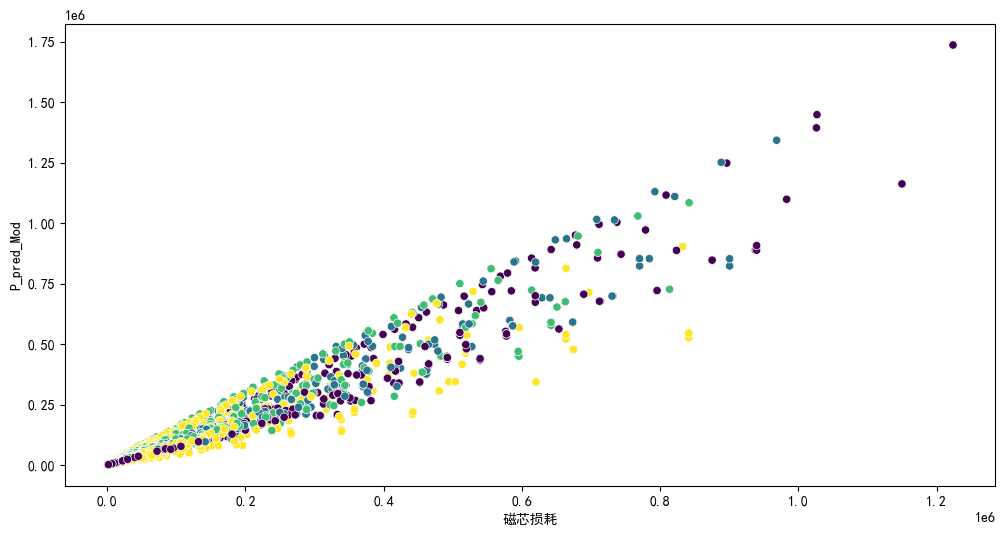

In [93]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='磁芯损耗', y='P_pred_Mod', hue='温度', data=data1, palette='viridis', label='修正SE预测')
sns.lineplot(x='磁芯损耗', y='磁芯损耗', data=data1, color='red', label='理想预测', linestyle='--')
plt.xlabel('实际磁芯损耗')
plt.ylabel('预测磁芯损耗 (修正SE)')
plt.title('修正斯坦麦茨方程预测值与实际值的对比')
plt.legend()
plt.show()

此图展示了修正斯坦麦茨方程（考虑温度因素后）的预测值与实际测量值的对比。与前一个图类似，数据点按温度进行颜色编码，红色虚线代表理想预测情况。

修正方程的预测结果与实际值更为接近，特别是在高温度条件下，预测值的准确性显著提高。这表明引入温度修正后，模型能够更好地适应不同温度下的磁芯损耗预测，改进了原始模型的预测性能。

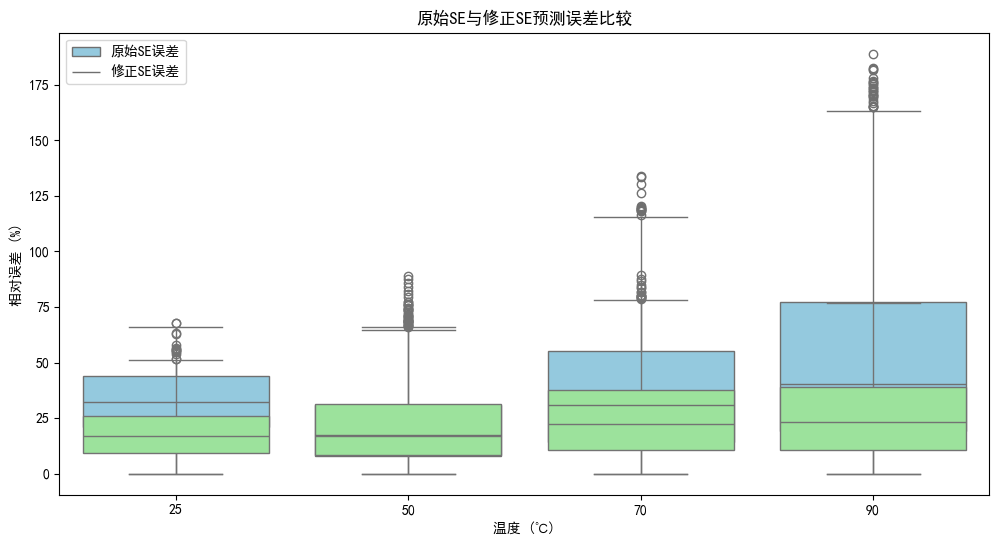

In [94]:
# 绘制误差比较图
plt.figure(figsize=(12, 6))
sns.boxplot(x='温度', y='误差_SE', data=data1, color='skyblue')
sns.boxplot(x='温度', y='误差_Mod', data=data1, color='lightgreen')
plt.xlabel('温度 (℃)')
plt.ylabel('相对误差 (%)')
plt.title('原始SE与修正SE预测误差比较')
plt.legend(['原始SE误差', '修正SE误差'])
plt.show()

箱线图展示了原始斯坦麦茨方程与修正方程在不同温度下的预测误差分布。图中显示了两种模型在各个温度下的相对误差，误差越小表示预测越精确。

从箱线图可以看出，修正后的斯坦麦茨方程在各温度下的误差都较原始方程小，尤其是在高温度下，修正后的误差显著低于原始方程。修正模型的误差分布更加集中，说明其预测更为稳定和准确。


平均相对误差：
原始斯坦麦茨方程：35.68%
修正斯坦麦茨方程：22.82%


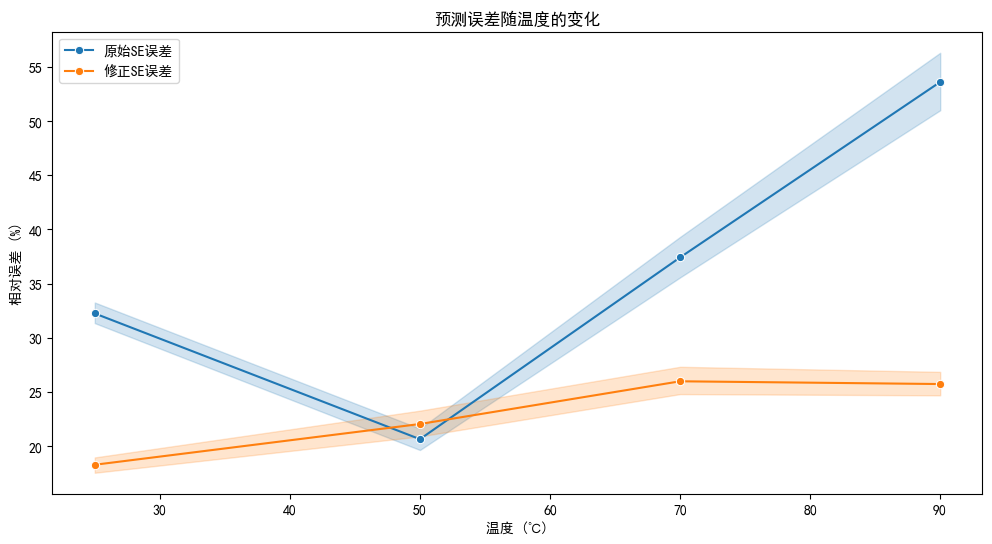

In [95]:
# 计算平均误差
mean_error_SE = data1['误差_SE'].mean()
mean_error_Mod = data1['误差_Mod'].mean()

print(f"\n平均相对误差：")
print(f"原始斯坦麦茨方程：{mean_error_SE:.2f}%")
print(f"修正斯坦麦茨方程：{mean_error_Mod:.2f}%")

# 绘制误差随温度的变化趋势
plt.figure(figsize=(12, 6))
sns.lineplot(x='温度', y='误差_SE', data=data1, marker='o', label='原始SE误差')
sns.lineplot(x='温度', y='误差_Mod', data=data1, marker='o', label='修正SE误差')
plt.xlabel('温度 (℃)')
plt.ylabel('相对误差 (%)')
plt.title('预测误差随温度的变化')
plt.legend()
plt.show()

此图展示了原始斯坦麦茨方程与修正方程的预测误差随温度变化的趋势。两条曲线分别表示两种模型的相对误差。

从图中可以明显看到，随着温度的升高，原始斯坦麦茨方程的误差逐渐增大，而修正后的方程能够保持较低且相对稳定的误差。这说明引入温度修正后，模型能够适应更广泛的温度范围，并显著减少高温条件下的预测误差。

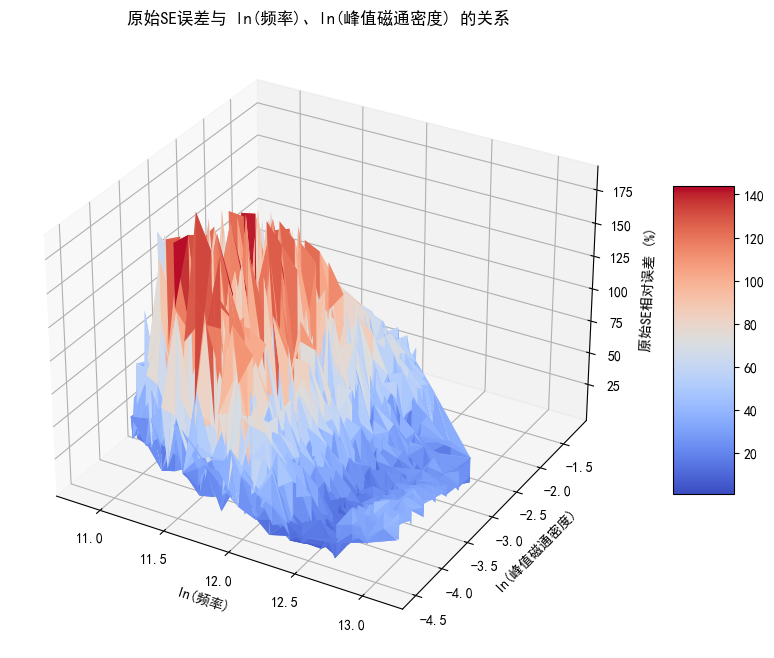

In [96]:

# 绘制 3D 图，展示误差与频率、峰值磁通密度的关系
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(np.log(data1['频率']), np.log(data1['峰值磁通密度']), data1['误差_SE'], cmap=cm.coolwarm, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('ln(频率)')
ax.set_ylabel('ln(峰值磁通密度)')
ax.set_zlabel('原始SE相对误差 (%)')
ax.set_title('原始SE误差与 ln(频率)、ln(峰值磁通密度) 的关系')
plt.show()

X轴（ln(频率)）和Y轴（ln(峰值磁通密度)）：

- 频率和峰值磁通密度是影响磁芯损耗的重要参数。
- 图中展示了磁芯损耗预测误差在频率和峰值磁通密度上的分布，颜色从蓝色到红色，表示误差的大小变化。蓝色代表误差较小的区域，红色代表误差较大的区域。

误差分布：

- 在低频率和较低的峰值磁通密度条件下，图中误差较小，主要呈现蓝色。
- 当频率和峰值磁通密度升高时，误差显著增大，逐渐呈现红色，尤其在高频率和高峰值磁通密度条件下，误差达到顶峰。

结论：原始斯坦麦茨方程在高频率和高峰值磁通密度下的预测误差较大，说明该模型在这些条件下的适用性较差，可能因为未考虑温度等关键因素。

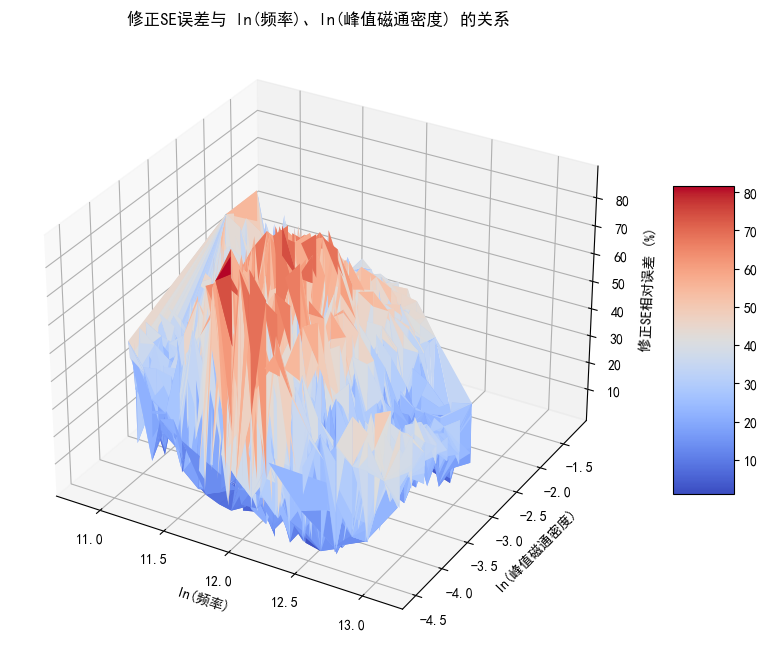

In [97]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(np.log(data1['频率']), np.log(data1['峰值磁通密度']), data1['误差_Mod'], cmap=cm.coolwarm, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('ln(频率)')
ax.set_ylabel('ln(峰值磁通密度)')
ax.set_zlabel('修正SE相对误差 (%)')
ax.set_title('修正SE误差与 ln(频率)、ln(峰值磁通密度) 的关系')
plt.show()


X轴（ln(频率)）和Y轴（ln(峰值磁通密度)）：

- 与图1相同，X轴代表频率，Y轴代表峰值磁通密度，颜色仍然表示误差大小。

误差分布：

- 在低频率和较低的峰值磁通密度条件下，误差仍然较小，主要呈现蓝色。
- 然而，与原始方程相比，修正方程在高频率和高峰值磁通密度下的误差显著减小，整体误差分布更加均匀。高误差的红色区域明显减少，这意味着修正后的模型在高频率、高磁通密度下也能保持相对较低的误差。

结论：修正斯坦麦茨方程有效降低了原始模型在高频率和高磁通密度条件下的预测误差，展示了其更强的适应性和更广泛的适用范围。

In [26]:
# data1.to_csv('Q2_data_resu.csv',index=None)